## METR-LA Dataset

In [5]:
from tsl.datasets import MetrLA, PemsBay, PeMS03

In [6]:
dataset = PeMS03('./data/PEMS03')

/home/rcappi/.conda/envs/my_env/lib/python3.12/site-packages/tsl/datasets/pems_benchmarks.py:59: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  index = pd.date_range(start=self.start_date,


In [7]:
edge_index, edge_attr = dataset.get_connectivity(
    threshold=0.1,
    include_self=False,
    normalize_axis=1,
    layout="edge_index"
)

In [8]:
df = dataset.dataframe()

In [9]:
import torch

raw_data = torch.from_numpy(df.values).unsqueeze(2)

In [10]:
raw_data.shape

torch.Size([26208, 358, 1])

In [11]:
T, n_nodes, _ = raw_data.shape

S = 288
I = T // S
reshaped_data = raw_data.view(I, S, n_nodes, 1)

In [12]:
reshaped_data.shape

torch.Size([91, 288, 358, 1])

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

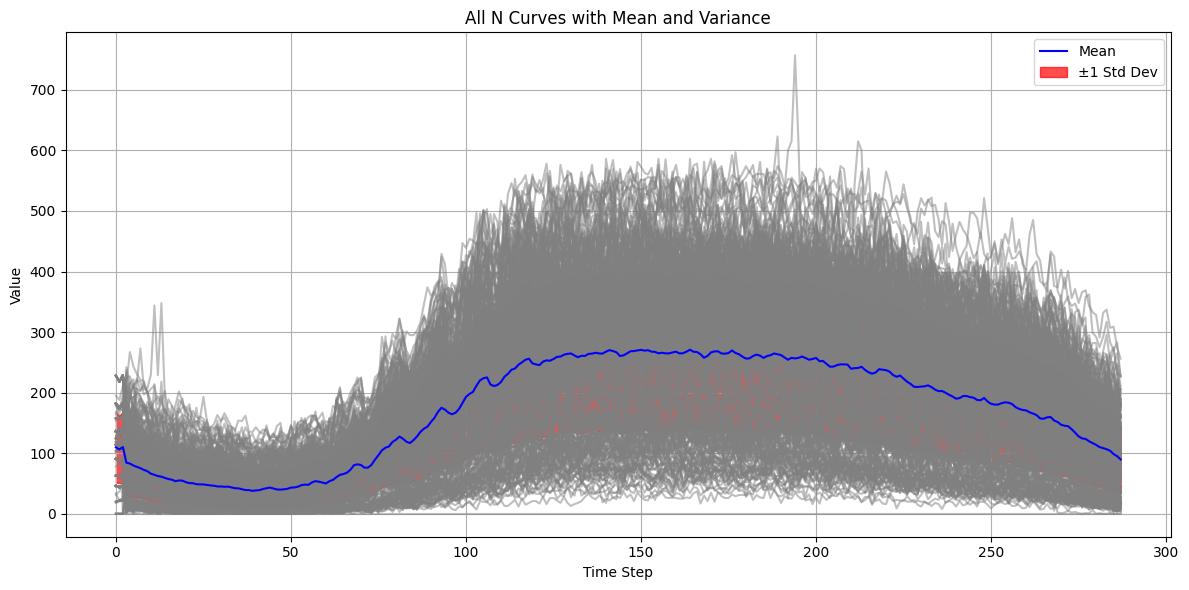

In [14]:
data_np = reshaped_data[0].squeeze(-1).cpu().detach().numpy()

# Time axis
x = np.arange(data_np.shape[0])

# Compute mean and std over axis=1 (N)
mean = data_np.mean(axis=1)
std = data_np.std(axis=1)

# Plot
plt.figure(figsize=(12, 6))

# Plot all individual curves
for i in range(data_np.shape[1]):
    plt.plot(x, data_np[:, i], color='gray', alpha=0.5)

# Plot mean curve
plt.plot(x, mean, color='blue', label='Mean')

# Plot ±1 std dev (variance) as shaded region
plt.fill_between(x, mean - std, mean + std, color='red', alpha=0.7, label='±1 Std Dev')

# Decorations
plt.title('All N Curves with Mean and Variance')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [15]:
from tsl.data.preprocessing.scalers import MinMaxScaler

In [16]:
scaler = MinMaxScaler(out_range=(-1, 1))
scaled_data = scaler.fit_transform(df.values)

In [17]:
scaled_data_reshaped = torch.from_numpy(scaled_data).unsqueeze(2).view(I, S, n_nodes, 1)

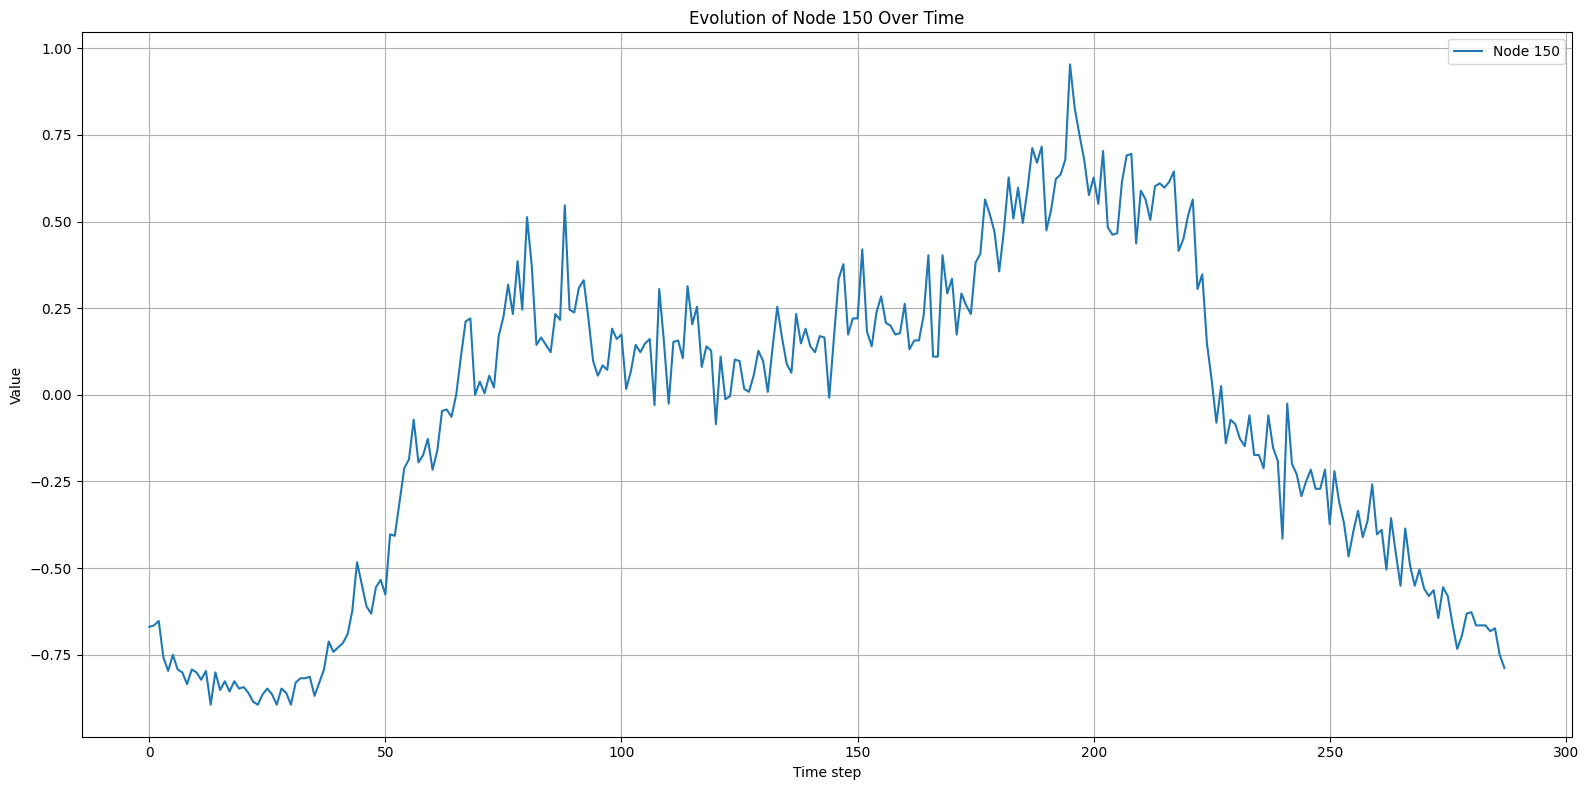

In [22]:
data_np = scaled_data_reshaped[10].cpu().detach().numpy()
node_index = 150

plt.figure(figsize=(16, 8))
plt.plot(data_np[:, node_index, :], label=f'Node {node_index}')
plt.xlabel('Time step')
plt.ylabel('Value')
plt.title(f'Evolution of Node {node_index} Over Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [19]:
reshaped_data = reshaped_data[:3]

In [ ]:
from utils.utils import sample_irregularly_per_ics


data_sampled, t_sampled = sample_irregularly_per_ics(
    data = reshaped_data,
    time = torch.linspace(0, 1, reshaped_data.size(1)).repeat(reshaped_data.size(0), 1),
    num_samples=30
)

In [26]:
data_sampled.shape

torch.Size([3, 30, 207, 1])